In [1]:
import numpy as np                 
import pandas as pd                    
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# Implementing the UCB
import math

N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            avg_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selection[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] = numbers_of_selection[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward
    

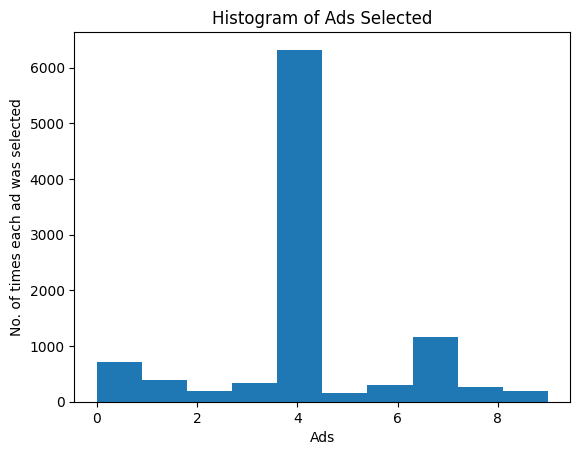

In [4]:
#Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad was selected')
plt.show()